In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import pickle

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
nTraj = 10000
time_step = 0.01
max_val = 50

def f(state, t):
  x, y, z = state  # unpack the state vector
  return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]  # derivatives


def createTraj(max_val, nPoints, time_step):
    traj = np.zeros((nPoints, 1, 3))
    # Randomize the starting point
    state0 = (random.randint(0,max_val),random.randint(0,max_val), random.randint(0,max_val))
    t = np.arange(0.0, nPoints*time_step, time_step)
    state = odeint(f, state0, t)
    traj[:,0,0] = state[:,0]/max_val
    traj[:,0,1] = state[:,1]/max_val
    traj[:,0,2] = state[:,2]/max_val
    return traj

# lengths = [10, 20, 30, 40, 50, 60, 80, 100, 120, 150]
l = 150
data = []
for i in range(nTraj):
    data.append(createTraj(max_val, l, time_step))
# Calculate the mean of each dimension and subtract it
data = np.array(data)

data[:,:,0,0] -= np.mean(data[:,:,0,0])
data[:,:,0,1] -= np.mean(data[:,:,0,1])
data[:,:,0,2] -= np.mean(data[:,:,0,2])

xmean = np.mean(data[:,:,0,0])
ymean = np.mean(data[:,:,0,1])
zmean = np.mean(data[:,:,0,2])
print(xmean, ymean, zmean) # Should all be 0

print(len(data))
print('Saving Data with %d points' % l)
with open('lorAttData/lorAtt_%d.pickle' % (l), 'wb') as f:
    pickle.dump(data, f)
    np.save('filesForTitan/lorAttData/lorAtt_%d.npy' % l, data)
        


(6.1604055190400689e-18, 1.3509785882585372e-17, 1.5823431454009552e-16)
10000
Saving Data with 150 points


In [24]:
import pickle
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open('lorAttData/lorAttv2_80.pickle', 'rb') as f:
    data = pickle.load(f)


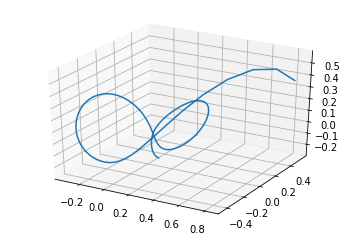

In [26]:
test= data[random.randint(0,len(data)-1)]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(test[:,0,0], test[:,0,1], test[:,0,2])
plt.show()

In [5]:
import os
import numpy as np
import pickle
for filename in os.listdir('filesForTitan/lorAttData/'):
    if filename.endswith(".pickle"):
        with open('lorAttData/' + filename, 'rb') as f:
            data = pickle.load(f)
        prefix = filename[:-len('.pickle')]
        np.save('filesForTitan/lorAttData/' + prefix + '.npy', data)

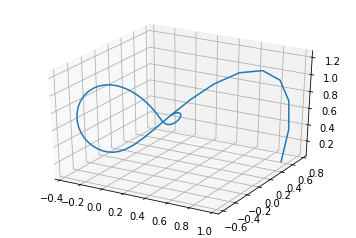

In [11]:
import pickle
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data = np.load('filesForTitan/lorAttData/lorAtt_100.npy')
test= data[random.randint(0,len(data)-1)]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(test[:,0,0], test[:,0,1], test[:,0,2])
plt.show()